<a href="https://colab.research.google.com/github/gustavor10silva/IC-Redes-Neurais-Artificiais/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Usaremos o dataset fashion_MNIST para testar estratégias de tunagem

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0006 - accuracy: 0.6808 - val_loss: 0.5092 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5074 - accuracy: 0.8260 - val_loss: 0.4476 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4471 - accuracy: 0.8431 - val_loss: 0.4552 - val_accuracy: 0.8340
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4144 - accuracy: 0.8533 - val_loss: 0.3926 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3860 - accuracy: 0.8642 - val_loss: 0.3939 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8656 - val_loss: 0.3689 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3578 - accuracy: 0.8751 - val_loss: 0.3586 - val_accuracy:

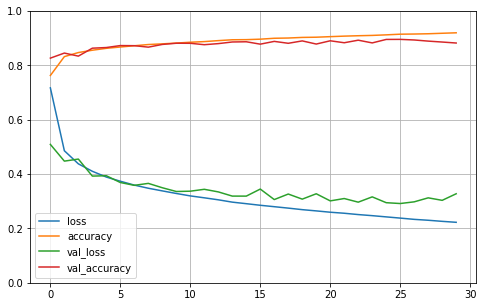

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 104.8773 - accuracy: 0.8001


[104.87725067138672, 0.8001000285148621]

* 2 camadas escondidas com 300 e 100 neurônios, respectivamente
* ReLU nas camadas escondidas
* softmax na camada de saída
* 30 épocas de treino
* Acurácia: 0.8737

In [12]:
X_test_scaled = X_test/255.0
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8737


[0.3589377701282501, 0.8737000226974487]

In [34]:
X_new = X_test[:3]
X_new_scaled = X_test_scaled[:3]
y_proba = model.predict(X_new)
y_proba.round(2), y_test[:3]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([9, 2, 1], dtype=uint8))

In [35]:
y_proba_scaled = model.predict(X_new_scaled)
y_proba_scaled.round(2), y_test[:3]

(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
        [0.  , 0.  , 0.93, 0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32), array([9, 2, 1], dtype=uint8))

# Uma camada com várias centenas de neurônios:

In [79]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(1000, activation="selu",kernel_initializer="lecun_normal"))
model2.add(keras.layers.Dense(1000, activation="selu",kernel_initializer="lecun_normal"))
model2.add(keras.layers.Dense(10, activation="softmax"))
model2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
model2.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_69 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_70 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [80]:
history2 = model2.fit(X_train, y_train, epochs=200,validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
1719/1719 [==============================] - 28s 16ms/step - loss: 0.6981 - accuracy: 0.7538 - val_loss: 0.4555 - val_accuracy: 0.8408
Epoch 2/200
1719/1719 [==============================] - 25s 15ms/step - loss: 0.4494 - accuracy: 0.8438 - val_loss: 0.4178 - val_accuracy: 0.8530
Epoch 3/200
1719/1719 [==============================] - 25s 15ms/step - loss: 0.4141 - accuracy: 0.8515 - val_loss: 0.4124 - val_accuracy: 0.8542
Epoch 4/200
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3986 - accuracy: 0.8570 - val_loss: 0.3860 - val_accuracy: 0.8658
Epoch 5/200
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3764 - accuracy: 0.8675 - val_loss: 0.3857 - val_accuracy: 0.8632
Epoch 6/200
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3678 - accuracy: 0.8678 - val_loss: 0.3735 - val_accuracy: 0.8704
Epoch 7/200
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3623 - accuracy: 0.8711 - val_loss: 0

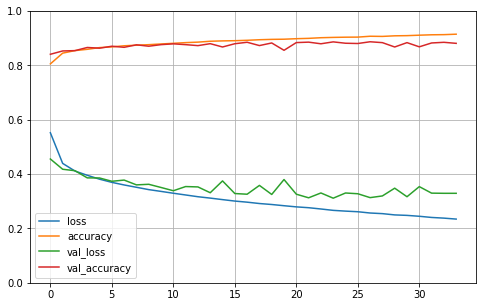

In [81]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [82]:
model2.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3569 - accuracy: 0.8736


[0.35687509179115295, 0.8736000061035156]

In [36]:
y_proba2 = model2.predict(X_new_scaled)
y_proba2.round(2), y_test[:3]

(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.91],
        [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32), array([9, 2, 1], dtype=uint8))

# Using GridSearchCV( ) and RandomizedSearchCV( )

In [29]:
def build_model3(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
  model3 = keras.models.Sequential()
  model3.add(keras.layers.Flatten(input_shape=input_shape))
  for layer in range(n_hidden):
    model3.add(keras.layers.Dense(n_neurons, activation="relu"))
  model3.add(keras.layers.Dense(10, activation="softmax"))
  model3.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
  return model3

In [30]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model3)

In [31]:
keras_reg.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0662 - accuracy: 0.6609 - val_loss: 0.5685 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5560 - accuracy: 0.8112 - val_loss: 0.4932 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4948 - accuracy: 0.8291 - val_loss: 0.4784 - val_accuracy: 0.8414
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4676 - accuracy: 0.8382 - val_loss: 0.4577 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4608 - accuracy: 0.8406 - val_loss: 0.4377 - val_accuracy: 0.8528
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.8462 - val_loss: 0.4268 - val_accuracy: 0.8534
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4310 - accuracy: 0.8493 - val_loss: 0.4198 - val_accuracy:

In [32]:
mse_test = keras_reg.score(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 92.3778 - accuracy: 0.7973


In [33]:
mse_test = keras_reg.score(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8559


In [41]:
X_new_scaled[0].shape

(28, 28)

In [45]:
# y_pred3 = keras_reg.predict(X_new_scaled) # não funcionou

In [46]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [0, 1, 2, 3],
#"n_neurons": np.arange(1, 100),
"n_neurons": [250, 500, 750, 1000],
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=30, # 100 epochs
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
1146/1146 [==============================] - 2s 2ms/step - loss: 1.1992 - accuracy: 0.6170 - val_loss: 0.6262 - val_accuracy: 0.7964
Epoch 2/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.6111 - accuracy: 0.7962 - val_loss: 0.5286 - val_accuracy: 0.8258
Epoch 3/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.8206 - val_loss: 0.4937 - val_accuracy: 0.8326
Epoch 4/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.4915 - accuracy: 0.8295 - val_loss: 0.4734 - val_accuracy: 0.8384
Epoch 5/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.4692 - accuracy: 0.8398 - val_loss: 0.4555 - val_accuracy: 0.8438
Epoch 6/30
1146/1146 [==============================] - 2s 1ms/step - loss: 0.4601 - accuracy: 0.8423 - val_loss: 0.4491 - val_accuracy: 0.8442
Epoch 7/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.4466 - accuracy: 0.8447 - val_loss: 0.4299 - val_accuracy:

RuntimeError: ignored

In [47]:
rnd_search_cv.best_params_

{'learning_rate': 0.004934843803017575, 'n_hidden': 2, 'n_neurons': 100}

In [48]:
rnd_search_cv.best_score_ #??????????

-0.3466300467650096

In [50]:
model3 = rnd_search_cv.best_estimator_.model3 # ????????????

AttributeError: ignored

In [52]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(10, activation="softmax"))
model4.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_56 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [53]:
model4.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0971 - accuracy: 0.6383 - val_loss: 0.5334 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5340 - accuracy: 0.8148 - val_loss: 0.4854 - val_accuracy: 0.8328
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4771 - accuracy: 0.8324 - val_loss: 0.4378 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4447 - accuracy: 0.8435 - val_loss: 0.4195 - val_accuracy: 0.8560
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4212 - accuracy: 0.8512 - val_loss: 0.4180 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3980 - accuracy: 0.8590 - val_loss: 0.4074 - val_accuracy: 0.8562
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3892 - accuracy: 0.8627 - val_loss: 0.3775 - val_accuracy:

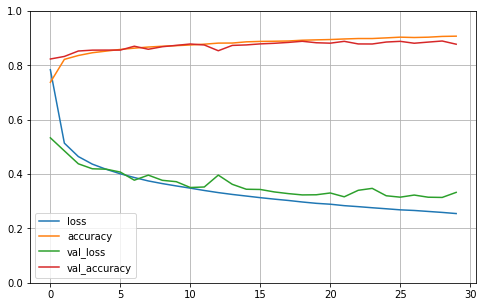

In [54]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [55]:
model4.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8714


[0.36585530638694763, 0.871399998664856]

# Treinando com uma camada escondida e várias centenas de neurônios